In [1]:
from eventio import IACTFile

In [2]:
f = IACTFile("/Users/dennisvanelten/Desktop/iceact/1_gamma_1.dat")   #hier steht der Pfad zu .dat Datei

In [3]:
event = f[0]

In [4]:
event.header.total_energy

6745.4819

In [5]:
event.photon_bunches[0].shape

(4234814,)

In [6]:
import pandas as pd

In [7]:
response = pd.read_csv("/Users/dennisvanelten/instrument-response/famous-parameterization-simulation.csv",index_col = 0) #hier steht der PFad zur sipm_response .csv Datei

In [8]:
response.head()

,phi,t_sipm,t_sipm_0,t_sipm_1,t_sipm_10,t_sipm_11,t_sipm_12,t_sipm_13,t_sipm_14,t_sipm_15,...,t_sipm_52_error,t_sipm_53_error,t_sipm_54_error,t_sipm_55_error,t_sipm_56_error,t_sipm_57_error,t_sipm_58_error,t_sipm_59_error,t_sipm_error,t_sipm_60_error
0,0.785398,0.0787,0.0633,0.0042,0.0000,0.0,0.0,0.0,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000141
1,2.356194,0.0775,0.0639,0.0000,0.0000,0.0,0.0,0.0,0.0001,0.0001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,3.926991,0.0773,0.0634,0.0000,0.0001,0.0,0.0,0.0,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000100
3,5.497787,0.0746,0.0608,0.0050,0.0001,0.0,0.0,0.0,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.392699,0.0814,0.0550,0.0144,0.0000,0.0,0.0,0.0,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [9]:
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

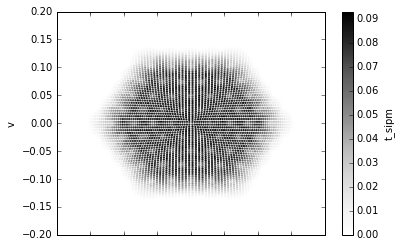

In [11]:
response.plot.scatter("u","v", c = "t_sipm",lw = 0, s = 5)

In [12]:
import numpy as np

In [13]:
total_response = np.zeros(len(response)) 
for pixel in range(61):
    column = "t_sipm_{}".format(pixel)
    total_response += response[column]

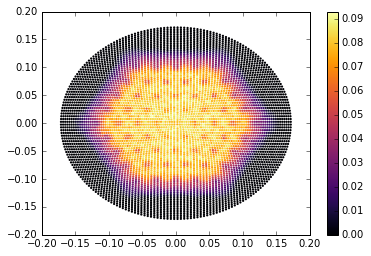

In [14]:
plt.scatter(response["u"], response["v"], c = total_response,lw = 0, s = 5, cmap='inferno')
plt.colorbar()

In [15]:
from scipy.spatial import KDTree

In [16]:
tree = KDTree(response[['u', 'v']].values)

In [17]:
tree.query((0, 0))

(0.0031894357136634769, 2)

In [18]:
tree.query?

In [19]:
photons = event.photon_bunches[0]

In [20]:
r = np.sqrt(photons['x']**2 + photons['y']**2)
mask = r < 25.35
selected_photons = photons[mask]

In [21]:
distances, indices = tree.query(np.column_stack([selected_photons['cx'], selected_photons['cy']]))

In [22]:
distances, indices
#array = distances, indices
#array

(array([ 0.00222609,  0.002217  ,  0.00086056,  0.00166822,  0.00227258,
         0.00134578,  0.00232896,  0.0018415 ,  0.00262121,  0.00210569,
         0.00152909,  0.00161201,  0.00237993,  0.00196618,  0.0014336 ,
         0.00122817,  0.00116499,  0.00113698,  0.00067515,  0.0020065 ,
         0.0008076 ,  0.00194275,  0.00186337,  0.0019179 ,  0.00091577,
         0.0013365 ,  0.00200096,  0.00196179,  0.0018021 ,  0.00029361,
         0.00226921,  0.00230328,  0.0024937 ,  0.00248224,  0.00044485,
         0.00245138,  0.00112329,  0.00108397]),
 array([  3,   2,  20,  10,   9,  76,  21,   9,  36,  35,   3,  10,   2,
         21,  20,  77,  11,  20,   2,  77,  20,   9,  20,   9,  10,  54,
         20,   9,  20, 344, 539,  20, 350, 898,  54, 299,  77, 135]))

In [23]:
sipm_response = response[['t_sipm_{}'.format(i) for i in range(61)]]

sipm = sipm_response.iloc[indices].apply(lambda x: np.argmax(x), axis=1)
pde = sipm_response.iloc[indices].max(axis=1)

In [24]:
sipm, pde

(3       t_sipm_0
 2       t_sipm_0
 20      t_sipm_0
 10      t_sipm_0
 9       t_sipm_0
 76      t_sipm_4
 21      t_sipm_0
 9       t_sipm_0
 36      t_sipm_0
 35      t_sipm_0
 3       t_sipm_0
 10      t_sipm_0
 2       t_sipm_0
 21      t_sipm_0
 20      t_sipm_0
 77      t_sipm_4
 11      t_sipm_0
 20      t_sipm_0
 2       t_sipm_0
 77      t_sipm_4
 20      t_sipm_0
 9       t_sipm_0
 20      t_sipm_0
 9       t_sipm_0
 10      t_sipm_0
 54      t_sipm_0
 20      t_sipm_0
 9       t_sipm_0
 20      t_sipm_0
 344     t_sipm_7
 539    t_sipm_10
 20      t_sipm_0
 350    t_sipm_12
 898    t_sipm_17
 54      t_sipm_0
 299    t_sipm_12
 77      t_sipm_4
 135     t_sipm_4
 dtype: object, 3      0.0608
 2      0.0634
 20     0.0496
 10     0.0621
 9      0.0547
 76     0.0443
 21     0.0436
 9      0.0547
 36     0.0390
 35     0.0428
 3      0.0608
 10     0.0621
 2      0.0634
 21     0.0436
 20     0.0496
 77     0.0352
 11     0.0558
 20     0.0496
 2      0.0634
 77     0.0352
 

In [25]:
df = pd.DataFrame(list(zip(sipm, pde)))

In [26]:
df

,0,1
0,t_sipm_0,0.0608
1,t_sipm_0,0.0634
2,t_sipm_0,0.0496
3,t_sipm_0,0.0621
4,t_sipm_0,0.0547
5,t_sipm_4,0.0443
6,t_sipm_0,0.0436
7,t_sipm_0,0.0547
8,t_sipm_0,0.0390
9,t_sipm_0,0.0428


In [27]:
df['detected'] = np.random.uniform(0, 1, len(df)) <= df[1]

In [28]:
df_detected = df[df.detected]
#df_detected

In [29]:
df_detected.columns = 'pixel', 'pde', 'detected'

In [30]:
df_detected.groupby('pixel')['pde'].count()

pixel
t_sipm_0     2
t_sipm_12    1
Name: pde, dtype: int64